In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = (pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=['Label','Text']))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label    5572 non-null object
Text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# CORPUS kumpulan Dokument
# DOKUMENT satu data

# TF = Term Frequency
# IDF = Inverse Document Frequency

# semakin sering kata itu muncul di dokument semakin penting kata itu
# semakin sering kata itu muncul di corpus semakin tidak penting kata itu

## FEATURE ENGINERING IN NLP

In [6]:
data['text_length'] = data['Text'].apply(lambda x:len(x))

In [7]:
import re

In [8]:
def clean_text(x):
    letter = re.sub("[^a-zA-Z]"," ",x)
    return ' '.join(letter.split()).lower()

In [9]:
data['Clean_text'] = data['Text'].apply(clean_text)

In [10]:
data['clean_text_lenght']= data['Clean_text'].apply(lambda x:len(x))

In [11]:
data

,Label,Text,text_length,Clean_text,clean_text_lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,102
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,126
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,43
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,60
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,freemsg hey there darling it s been week s now...,135
6,ham,Even my brother is not like to speak with me. ...,77,even my brother is not like to speak with me t...,75
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,as per your request melle melle oru minnaminun...,152
8,spam,WINNER!! As a valued network customer you have...,157,winner as a valued network customer you have b...,128
9,spam,Had your mobile 11 months or more? U R entitle...,154,had your mobile months or more u r entitled to...,137


## MEANINGFULL WORD ON EVERY DOC

In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [13]:
count_vectorizer_transformer = CountVectorizer().fit(data['Clean_text'])

In [14]:
count_vectorizer_res = count_vectorizer_transformer.transform(data['Clean_text'])

In [15]:
(pd.DataFrame(count_vectorizer_res.todense(),columns=count_vectorizer_transformer.get_feature_names()))

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
tf_id_transformer=TfidfTransformer().fit(count_vectorizer_res)

In [17]:
tf_idf_res = tf_id_transformer.transform(count_vectorizer_res)

In [18]:
df_TF_idf=pd.DataFrame(tf_idf_res.todense(),columns=count_vectorizer_transformer.get_feature_names())

In [19]:
meaningfulword=[]
for item in range(len(df_TF_idf)):
    meaningfulword.append(list(df_TF_idf.iloc[item].sort_values(ascending=False).head(3).index))
data['meaningful_word']=meaningfulword
data

,Label,Text,text_length,Clean_text,clean_text_lenght,meaningful_word
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,102,"[jurong, amore, buffet]"
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,23,"[oni, joking, wif]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,126,"[fa, entry, tkts]"
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,43,"[say, hor, early]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,60,"[he, lives, nah]"
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,freemsg hey there darling it s been week s now...,135,"[chgs, rcv, tb]"
6,ham,Even my brother is not like to speak with me. ...,77,even my brother is not like to speak with me t...,75,"[aids, patent, like]"
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,as per your request melle melle oru minnaminun...,152,"[melle, callertune, your]"
8,spam,WINNER!! As a valued network customer you have...,157,winner as a valued network customer you have b...,128,"[claim, receivea, kl]"
9,spam,Had your mobile 11 months or more? U R entitle...,154,had your mobile months or more u r entitled to...,137,"[update, mobile, free]"


### EDA

In [20]:
from collections import Counter

In [21]:
import nltk

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

In [24]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
def show_most_words_appear(data,N):
    all_word = ' '.join(list(data))
    list_all_words = all_word.split()
    word_count = Counter(list_all_words)
    word_count_series = pd.Series(word_count)
    word_wo_stopwords = []
    for item in word_count_series.index:
        if (item not in stopwords.words('english')):
            word_wo_stopwords.append(item)
    word_count_series = word_count_series.loc[word_wo_stopwords]
    most_words_appear= word_count_series.sort_values(ascending=False).head(N)
    plt.figure(figsize=(15,5))
    sns.barplot(most_words_appear.index,most_words_appear.values)

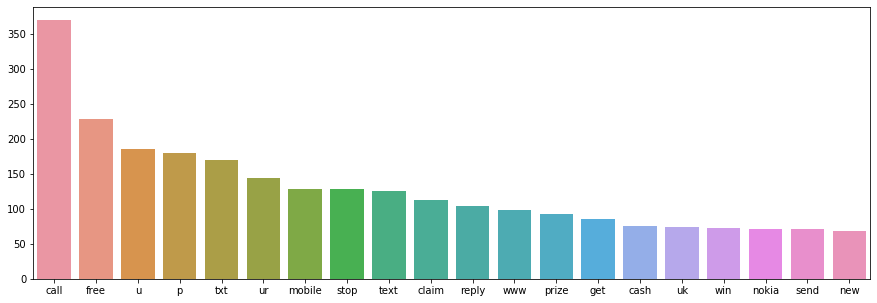

In [26]:
show_most_words_appear(data[data['Label']=='spam']['Clean_text'],20)

In [29]:
pd.Series(new_meaningfull)

0                 jurong amore buffet
1                      oni joking wif
2                       fa entry tkts
3                       say hor early
4                        he lives nah
5                         chgs rcv tb
6                    aids patent like
7               melle callertune your
8                   claim receivea kl
9                  update mobile free
10               cried anymore enough
11                csh chances tsandcs
12                    dbuk rw jackpot
13                   promise for been
14                   sunday date with
15       xxxmobilemovieclub click wap
16                   watching oh here
17                  spell wet naughty
18                      way gota that
19                   team england txt
20               spell seriously name
21                   ha joking months
22                    stock comin pay
23                   lunch finish lor
24          ffffffffff sooner alright
25                  forced slice turn
26          

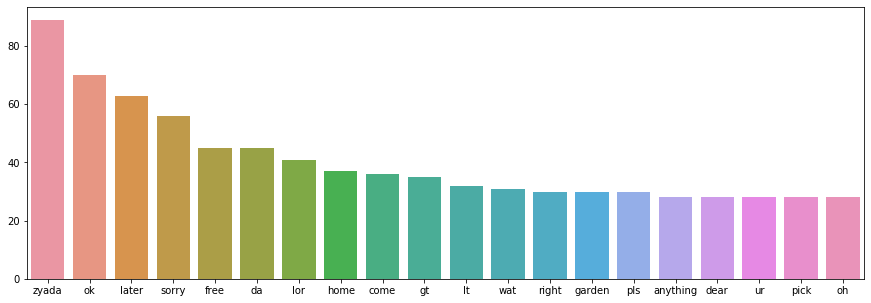

In [28]:
new_meaningfull = [' '.join(item) for item in data['meaningful_word']]
show_most_words_appear(pd.Series(new_meaningfull),20)

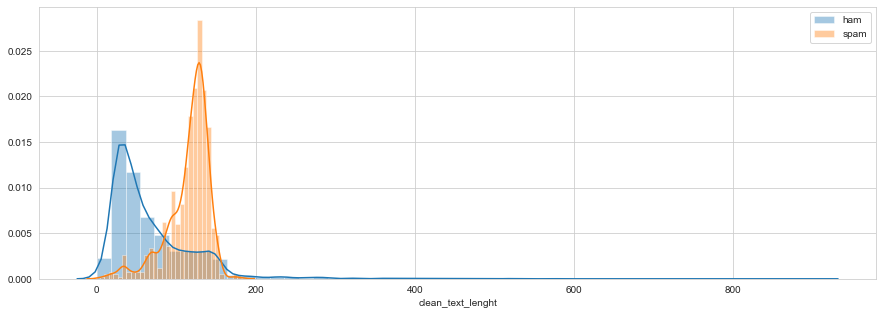

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.distplot(data[data['Label']=='ham']['clean_text_lenght'],label='ham')
sns.distplot(data[data['Label']=='spam']['clean_text_lenght'],label='spam')
plt.legend()

## modeling

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [32]:
# sparse metrics dari TF IDF
# X_train,X_test,y_train,y_test = train_test_split(tf_idf_res , data['Label'], random_state=101,,stratify=data['Label'])

In [33]:
X_train,X_test,y_train,y_test = train_test_split(tf_idf_res , data['Label'], random_state=101)

In [34]:
model_1 = MultinomialNB().fit(X_train,y_train)
prediction = model_1.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1227
        spam       1.00      0.64      0.78       166

    accuracy                           0.96      1393
   macro avg       0.98      0.82      0.88      1393
weighted avg       0.96      0.96      0.95      1393



In [35]:
mes = 'congratulation you win alot of my attentions i love you 3000 nokia siemens ericson spam'
cv=count_vectorizer_transformer.transform([mes])
tf= tf_id_transformer.transform(cv)
model_1.predict(tf)

array(['ham'], dtype='<U4')

In [36]:
def showwordcloud(text):
    from wordcloud import WordCloud
    wc=WordCloud(background_color='black', max_font_size=40,max_words=200)
    my_wc= wc.generate(text)
    plt.figure(figsize=(15,5))
    plt.imshow(my_wc,interpolation="bilinear")
    plt.axis('off')
    plt.show()

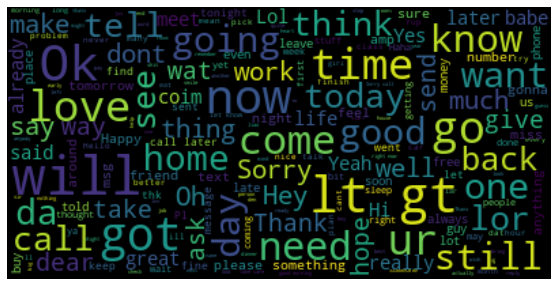

In [37]:
showwordcloud(' '.join(list(data[data['Label']=='ham']['Text'])))

In [38]:
s='jakarta sudah tidur 2.00 pm'
alpha='a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z, '.split(',')

In [39]:
alpha

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 ' ']